# <center>Solution: Finding the percentage of male and female employees of UFRN </center> 
**<center>UFRN-DATA SCIENCE</center> **
**<center>Luis Ortiz</center> **
**<center>Elizabeth Cabrera</center> **

In [1]:
import pandas as pd
import rpy2.interactive as r
import rpy2.interactive.packages
from IPython.core.display import clear_output
import requests, json
from urllib.request import urlopen
import numpy as np

# WITH GENDER BRAZILIAN DICTIONARIES AND GENDER BR
r.packages.importr("genderBR")
rlib = r.packages.packages
rlib.genderBR

# WITH GENDER API
myKey = "ltYSNPlPXUEPwWoQFQ"

In [2]:
names_dictionary = pd.read_csv("names_dictionary.csv", encoding = 'latin-1', usecols=['Male', 'Female'])

UFRN_employees = pd.read_csv("UFRN_employees.csv", encoding = 'latin-1', usecols=['UFRN_employees'])
UFRN_employees = UFRN_employees.apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('latin-1'))
UFRN_employees = UFRN_employees.apply(lambda x: x.astype(str).str.lower())
UFRN_employees['Gender'] = ""

for i, name in enumerate(UFRN_employees['UFRN_employees']):
    FirstName = name.split()[0]
    flag = names_dictionary.apply(lambda row: row.astype(str).str.contains(r'(?:\s|^)'+FirstName+'(?:\s|$)').any(), axis=0)
    if flag[0]:
        UFRN_employees['Gender'].loc[i] = 'male'
        print(name, 'male', 'Dictionary')
        clear_output(wait = True)
    elif flag[1]:
        UFRN_employees['Gender'].loc[i] = 'female'
        print(name, 'female', 'Dictionary')
        clear_output(wait = True)
    elif (flag[0] & flag[1]) == False:  
        resp_array = rlib.genderBR.get_gender(FirstName) 
        gender = resp_array[0]
        if (str(gender) != 'NA'):   
            UFRN_employees['Gender'].loc[i] = gender
            print(name, gender, 'Gender BR')
            clear_output(wait = True)
        else:
            url = "https://gender-api.com/get?key=" + myKey + "&name="+FirstName
            response = urlopen(url)
            decoded = response.read().decode('utf-8')
            data = json.loads(decoded)
            res = data["gender"]  
            print(name, res, type(res))
            clear_output(wait = True)
            if res != 'unknown':
                UFRN_employees['Gender'].loc[i] = res
                print(name, res, 'Gender API')
                clear_output(wait = True)
            else:        
                UFRN_employees['Gender'].loc[i] = np.nan
                print(name, 'NaN')
                clear_output(wait = True)


zulmara virginia de carvalho                  Female Gender BR


In [3]:
UFRN_employees = UFRN_employees.apply(lambda x: x.astype(str).str.lower())

names_dictionary_add = {
    'herbenny' : 'female',
    'audinez' : 'female',
    'antonnyo': 'male',
    'altaiva' : 'female',
    'acynelly' : 'female',
    'adenylza' : 'female',
    'adlareg' : 'female',
    'akaline' : 'female',
    'albanyra' : 'female',
    'alvessena' : 'female',
    'alzivany' : 'female',
    'amadja' : 'female',
    'amalusia' : 'female',
    'amoysa' : 'female',
    'andierison' : 'male',
    'anellysa' : 'female',
    'apuena' : 'female',
    'arethe' : 'female',
    'arrhenius' : 'male',
    'artejose' : 'male',
    'askery' : 'male',
    'auniebson' : 'male',
    'aurigena' : 'female',
    'auxinildo' : 'male',
    'auzelivia' : 'female',
    'barnora' : 'female',
    'brunilla' : 'female',
    'chianc' : 'male',
    'ciclamio' : 'male',
    'cijara' : 'female',
    'christomyslley' : 'male',
    'crisdavid' : 'male',
    'crisluci' : 'female',
    'dandiva' : 'female',
    'dacifran' : 'male',
    'dayhenni' : 'female',
    'dejadiere' : 'female',
    'deriscleia' : 'female',
    'diomadson' : 'male',
    'djailde' : 'female',
    'djanni' : 'male',
    'egmar' : 'female',
    'elikassya' : 'female',
    'elisanie' : 'female',
    'enoleide' : 'female',
    'eriama' : 'female',
    'erickinson' : 'male',
    'ermeton' : 'male',
    'eryvaldo' : 'male',
    'esmeralucia' : 'female',
    'esthephania' : 'female',
    'eudenilson' : 'male',
    'eunadia' : 'female',
    'euristania' : 'female',
    'eusamar' : 'female',
    'fladjany' : 'female',
    'flaviery' : 'male',
    'francoira' : 'female',
    'freudson' : 'male',
    'galtieri' : 'male',
    'gaugefran' : 'male',
    'geilne' : 'female',
    'geomerez': 'male',
    'gidyenne' : 'female',
    'gilzemberg': 'male',
    'gleiko': 'male',
    'glynner': 'female',
    'gracimary': 'female',
    'gunthineia': 'female',
    'gylce': 'female',
    'hadiellson': 'male',
    'halcima': 'female',
    'hallissa' : 'female',
    'hareton' : 'male',
    'hartt' : 'male',
    'helderes' : 'male',
    'herciane' : 'female',
    'hindiael' : 'male',
    'hortevan' : 'male',
    'huganisa' : 'female',
    'huldmary': 'female',
    'hylarina' : 'female',
    'iage' : 'male',
    'iapony' : 'male',
    'idausa' : 'female',
    'ilisdayne' : 'female',
    'illanne' : 'female',
    'isauremi' : 'female',
    'ivanielly' : 'female',
    'jadnaelson' : 'male',
    'ivanilka' : 'female',
    'janeusa' : 'female',
    'jaqueligia' : 'female',
    'janmilli' : 'female',
    'jazielli' : 'female',
    'jessicley' : 'female',
    'joadete' : 'male',
    'jocekleyton' : 'male',
    'jodeylson' : 'male',
    'johnnatas' : 'male',
    'josalmir' : 'male',
    'josceliano' : 'male',
    'joseilce' : 'female',
    'josenalde' : 'male',
    'joymara' : 'male',
    'judney' : 'male',
    'jussuer': 'male',
    'julyherme' : 'male',
    'kalieny' : 'female',
    'kallile' :'female',
    'karilany' : 'female',
    'karylane' : 'female',
    'karllyammo' : 'male',
    'kattarine' : 'female',
    'keivilany' : 'female',
    'kivhia' : 'female',
    'kelienny': 'female',
    'kivyson' :  'male',
    'laddyla' : 'female',
    'lahelya' : 'female',
    'lamoniara' : 'female',
    'lannuzya' : 'female',
    'laralis' : 'female',
    'letissandra' : 'female',
    'louisianny' : 'female',
    'lousardo' : 'male',
    'lucypaula' : 'female',
    'lyrene' : 'female',
    'macerly' : 'female',
    'massilde' : 'female',
    'menilla' : 'female',
    'mirnari' : 'female',
    'moaldecir' : 'male',
    'muirakytan' : 'male',
    'naiche' : 'male',
    'naisandra': 'female',
    'naiyan': 'male',
    'nazineide' : 'female',
    'nerideus' : 'male',
    'neyjmme' : 'female',
    'niegia' : 'female',
    'nkarthe' : 'female',
    'nyladih' : 'male',
    'olganielle' : 'male',
    'orgival' : 'male',
    'pagandai' : 'male',
    'phietica' : 'female',
    'pledson' : 'male',
    'radegundis' : 'male',
    'reivla': 'female',
    'rencio': 'male',
    'reymard': 'male',
    'rinadja' : 'female',
    'rivus' : 'female',
    'roberttha' : 'female',
    'romayana' : 'female',
    'ronabson' : 'male',
    'ronedilk': 'male',
    'rosaver' : 'male',
    'rusceli': 'male',
    'rutacio' : 'male',
    'ruthnaldo' : 'male',
    'salichoa' : 'female',
    'saneiriany' : 'female',
    'semely' : 'female',
    'sheylena' : 'female',
    'shirlle' : 'female',
    'sislley' : 'male',
    'sonaydy' : 'female',
    'sonemy' : 'female',
    'soraneide' : 'female',
    'sthone' : 'male',
    'samaherni' : 'male',
    'sueilha' : 'female',
    'suzerica' : 'female',
    'taanake' : 'female',
    'taniro': 'male',
    'tarciro': 'male',
    'thazio': 'male',
    'thecyus': 'male',
    'uiliete' : 'female',
    'valtemia' : 'female',
    'vanci' : 'female',
    'vandiner' : 'female',
    'wadleighn' : 'male',
    'walteca': 'male',
    'walanne' : 'female',
    'walnesia' : 'female',
    'wilaci' : 'male',
    'wilsynnara' : 'female',
    'wouber' : 'male',
    'yanak' : 'female',
    'yulyanna' : 'female',
    'zankennedy' : 'male',
    'zenewton' : 'male',
    'zivanilson' : 'male',
    'zorano' : 'male',
    'zulamar' : 'male'
}

ind = UFRN_employees[(UFRN_employees['Gender'])==str(np.nan)].index.tolist()

for i in ind:
    name  = UFRN_employees['UFRN_employees'].values[i]
    FirstName = name.split()[0]
    response = names_dictionary_add[FirstName]
    UFRN_employees['Gender'].loc[i] = response
    print(name, flag)
    clear_output(wait = True)

UFRN_employees.to_csv("UFRN_employees_Gender.csv")

zulamar de sales barbalho                    Male      False
Female    False
dtype: bool


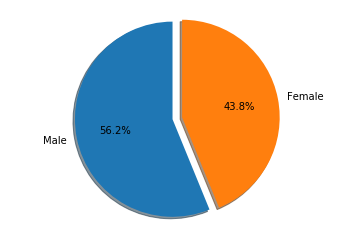

In [4]:
import matplotlib.pyplot as plt

num_emp = {}
num_emp  = UFRN_employees['Gender'].astype('str').value_counts()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = num_emp.values
explode = (0.1, 0)  # only "explode" the 1srt slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

The most common names in UFRN are:


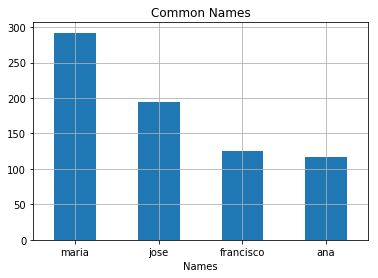

In [7]:
import matplotlib.pyplot as plt

ind2 = UFRN_employees.index.tolist()
UFRN_employees2 = pd.DataFrame(columns=['Comun'], index = ind2)

for i in ind2:
    name  = UFRN_employees['UFRN_employees'].values[i]
    FirstName = name.split()[0]
    UFRN_employees2['Comun'].loc[i] = FirstName

print("The most common names in UFRN are:")
repet = UFRN_employees2['Comun'].value_counts()

repet.iloc[0:4].plot(kind='bar', grid=True, rot=0)
plt.title('Common Names')
plt.xlabel('Names')
plt.show()